In [6]:
from asist.utility import binavg, running_mean, power_spectrum
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import detrend
from sustain_drag_2020.udm import read_udm_from_toa5
from sustain_drag_2020.fetch import fetch
import warnings
import os

warnings.filterwarnings('ignore')


In [7]:
DATAPATH='/Users/peisen/documents/SUSTAIN_DATA_2019-11-21'
files = glob.glob(DATAPATH + '/TOA5_SUSTAIN_ELEVx6_20Hz*.dat')

# experiment parameters
fan = range(0, 65, 5)
run_seconds = 600
start_time = datetime(2019, 11, 21, 16, 10)
end_time = start_time + timedelta(seconds=run_seconds * len(fan))

Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1276_2019_11_21_1700.dat
Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1275_2019_11_21_1600.dat
Reading  TOA5_SUSTAIN_ELEVx6_20Hz.ELEV_1277_2019_11_21_1800.dat


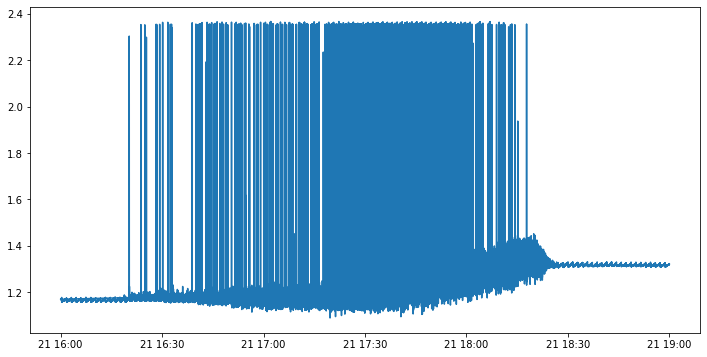

In [8]:
time_, u1, u2, u3, u4, u5, u6 = read_udm_from_toa5(files)
fig = plt.figure(figsize=(12, 6))
plt.plot(time_,u1) # to see what it looks like

In [9]:
import numpy as np
import pandas as pd
def quality_control(x,way):
    xx = x * np.ones(x.size)
    offset = np.mean(xx[:(20 * 600)]) # offset first 10 minutes
    xx = offset - xx
    for i in range(0,len(xx)-2):
        if xx[i]<-0.3:  # threshold 1, absolute value
            xx[i]=np.nan
    for i in range(0,len(xx)-2):
        if (xx[i]-xx[i+1])>.08: #threshold 2, deviation 
            xx[i+1]=np.nan
    xx1=pd.DataFrame(data=xx)
    xx2=xx1.interpolate(method=way,order=3)
    xx3=np.array(xx2)[:,0]
    return xx3
            




In [10]:
def elevation_from_udm(x):
    """Remove spikes and offset."""
    xx = x * np.ones(x.size)
    for n in range(10):
        for i in range(1, xx.size-1):
            if xx[i] > 1.5:
                xx[i] = 0.5 * (xx[i-1] + xx[i+1])
    offset = np.mean(xx[:(20 * 600)]) # offset first 10 minutes
    xx = offset - xx
    return xx



Text(0.5, 1.0, 'Original Method from Github')

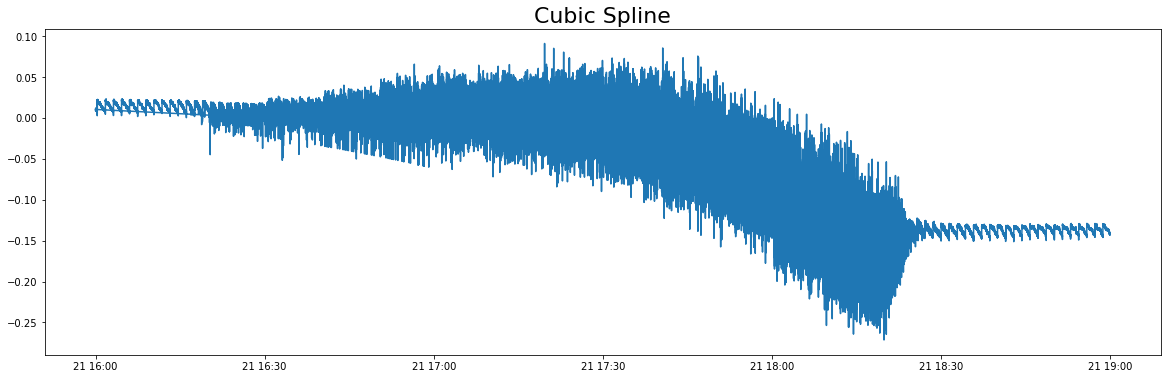

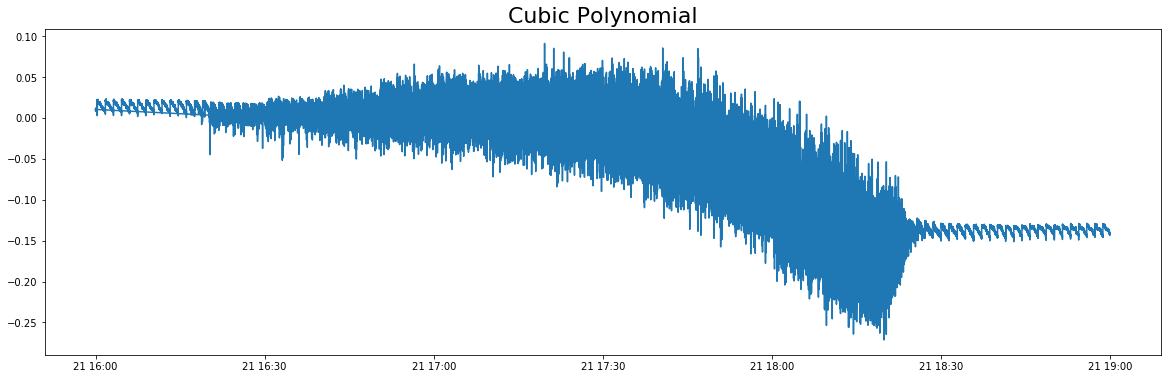

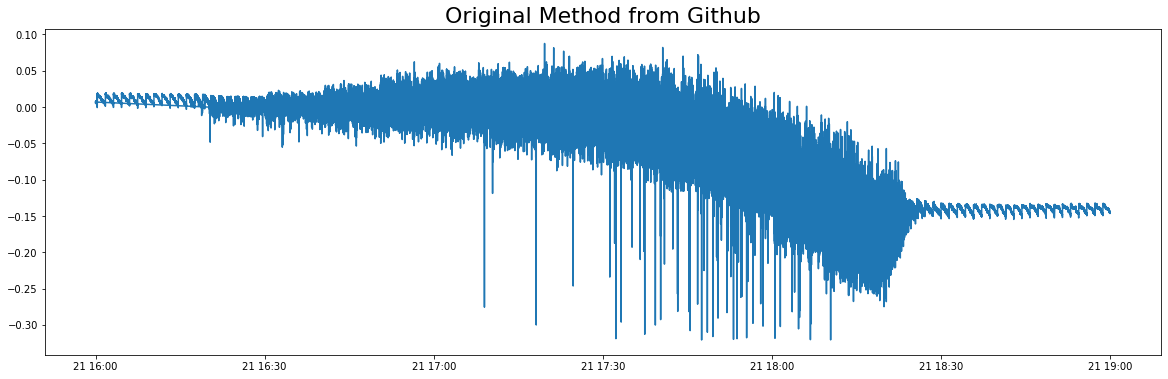

In [13]:
# Remove spikes according to absolute value:
import numpy as np
import pandas as pd
def quality_control(x,way):
    xx = x * np.ones(x.size)
    offset = np.mean(xx[:(20 * 600)]) # offset first 10 minutes
    xx = offset - xx
    for i in range(0,len(xx)-2):
        if xx[i]<-0.3:  # threshold 1, absolute value
            xx[i]=np.nan
    for i in range(0,len(xx)-2):
        if (xx[i]-xx[i+1])>.08: #threshold 2, deviation 
            xx[i+1]=np.nan
    xx1=pd.DataFrame(data=xx)
    xx2=xx1.interpolate(method=way,order=3)
    xx3=np.array(xx2)[:,0]
    return xx3
            

def elevation_from_udm(x):
    """Remove spikes and offset."""
    xx = x * np.ones(x.size)
    for n in range(10):
        for i in range(1, xx.size-1):
            if xx[i] > 1.5:
                xx[i] = 0.5 * (xx[i-1] + xx[i+1])
    offset = np.mean(xx[:(20 * 600)]) # offset first 10 minutes
    xx = offset - xx
    return xx

fig = plt.figure(figsize=(20, 6))
plt.plot(time_,quality_control(u1,'spline'))
plt.title('Cubic Spline',fontsize=22)

fig = plt.figure(figsize=(20, 6))
plt.plot(time_,quality_control(u1,'polynomial'))
plt.title('Cubic Polynomial',fontsize=22)

fig = plt.figure(figsize=(20, 6))
plt.plot(time_,elevation_from_udm(u1))
plt.title('Original Method from Github',fontsize=22)


